In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../datasets/bank_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [5]:
geoEnc = OneHotEncoder(drop='first')
geodummies = geoEnc.fit_transform(df[['Geography']]).toarray()
geodummies

array([[0., 0.],
       [0., 1.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 0.],
       [0., 0.]])

In [6]:
genderEnc = LabelEncoder()
df.Gender = genderEnc.fit_transform(df.Gender)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.drop(['Geography','Surname','Gender'],axis=1,inplace=True)
df.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data = np.append(geodummies,df.values,axis=1)
data.shape

(10000, 13)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
x = data[:,:-1]
y = data[:,-1]
scaler = StandardScaler()
x = scaler.fit_transform(x)
trainx,testx,trainy,testy = train_test_split(x,y,test_size=.2,random_state=0)
trainx.shape

(8000, 12)

## creating a neural network

In [16]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Dense(units=6,
                                     activation = tf.keras.activations.relu, #you can also write activation='relu'
                                     input_dim=x.shape[1])) #x.shape[1] is the input
classifier.add(tf.keras.layers.Dense(units=6,
                                     activation = tf.keras.activations.relu))
classifier.add(tf.keras.layers.Dense(units=1,
                                      activation=tf.keras.activations.sigmoid))
# 3 layer ANN

In [18]:
classifier.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.binary_crossentropy,
                   metrics=[tf.keras.metrics.binary_accuracy])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


In [19]:
tensorboard_callback = tf.keras.callbacks.TensorBoard('ann_logs',histogram_freq=1)

In [35]:
history = classifier.fit(trainx,
                        trainy,
                        epochs=35,
                        callbacks=[tensorboard_callback])


Epoch 1/35
250/250 [==============================] - 1s 4ms/step - loss: 0.3397 - binary_accuracy: 0.8635
Epoch 2/35
250/250 [==============================] - 1s 2ms/step - loss: 0.3395 - binary_accuracy: 0.8635
Epoch 3/35
250/250 [==============================] - 0s 1ms/step - loss: 0.3394 - binary_accuracy: 0.8637
Epoch 4/35
250/250 [==============================] - 0s 1ms/step - loss: 0.3393 - binary_accuracy: 0.8644
Epoch 5/35
250/250 [==============================] - 0s 1ms/step - loss: 0.3391 - binary_accuracy: 0.8637
Epoch 6/35
250/250 [==============================] - 0s 1ms/step - loss: 0.3392 - binary_accuracy: 0.8631
Epoch 7/35
250/250 [==============================] - 0s 1ms/step - loss: 0.3386 - binary_accuracy: 0.8648
Epoch 8/35
250/250 [==============================] - 1s 2ms/step - loss: 0.3385 - binary_accuracy: 0.8640
Epoch 9/35
250/250 [==============================] - 0s 1ms/step - loss: 0.3387 - binary_accuracy: 0.8639
Epoch 10/35
250/250 [================

In [36]:
import matplotlib.pyplot as plt

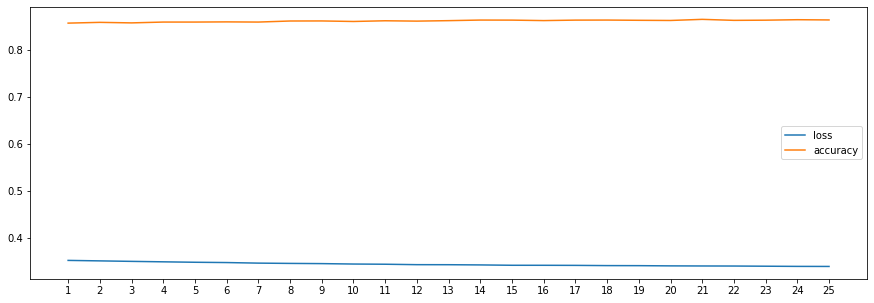

In [31]:
plt.figure(figsize=(15,5))
epochs = range(1,26)
plt.plot(epochs,history.history.get('loss'),label='loss')
plt.plot(epochs,history.history.get('binary_accuracy'),label='accuracy')
plt.ylim=[0,1]
plt.xticks(epochs)
plt.legend()
plt.show()

In [32]:
output = classifier.predict(testx[:10])

In [34]:
for val,i in zip(testx,output):
    val = scaler.inverse_transform(val)
    if i>.5:
        print(val,1)
    else:
        print(val,0)

[1.0000000e+00 0.0000000e+00 9.3950000e+03 1.5615753e+07 5.9700000e+02
 3.5000000e+01 8.0000000e+00 1.3110104e+05 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.9285267e+05] 0
[0.0000000e+00 0.0000000e+00 8.9900000e+02 1.5654700e+07 5.2300000e+02
 4.0000000e+01 2.0000000e+00 1.0296741e+05 1.0000000e+00 1.0000000e+00
 0.0000000e+00 1.2870210e+05] 0
[0.0000000e+00 1.0000000e+00 2.3990000e+03 1.5633877e+07 7.0600000e+02
 4.2000000e+01 8.0000000e+00 9.5386820e+04 1.0000000e+00 1.0000000e+00
 1.0000000e+00 7.5732250e+04] 0
[0.0000000e+00 0.0000000e+00 5.9070000e+03 1.5745623e+07 7.8800000e+02
 3.2000000e+01 4.0000000e+00 1.1207958e+05 1.0000000e+00 0.0000000e+00
 0.0000000e+00 8.9368590e+04] 0
[1.0000000e+00 0.0000000e+00 2.3440000e+03 1.5765902e+07 7.0600000e+02
 3.8000000e+01 5.0000000e+00 1.6303482e+05 2.0000000e+00 1.0000000e+00
 1.0000000e+00 1.3566217e+05] 0
[0.0000000e+00 1.0000000e+00 8.2260000e+03 1.5804142e+07 6.7000000e+02
 5.7000000e+01 3.0000000e+00 1.7557595e+05 2.0000000e+00 1.